<a href="https://colab.research.google.com/github/MaddieMcGreevy/HW-3/blob/main/Maddiehomework03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 03: You will run Logistic Regression, K-Nearest Neighbor, Decision Tree, and Random Forest Classifier to predict survival for the Titanic Dataset.

## Then, you will check and print the performance of your model.

---------

#### First, get all your required packages. Note: the list below is not exhaustive, if you need more packages, please import them as needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### We are going to obtain the Titanic dataset from DataScienceDojo's github page. Thank you to them for the readily available data.

Here is the link: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

Import the file as a DataFrame called `titanic`.

In [2]:
# https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **`Survived`** is your target variable, also known as your dependent variable.

## Your attributes/features/independent variables will help predict survival on the Titanic.

### But first, you need to preprocess the data.


*  Note: **`Survived`** is your target variable (**Y**).

* **`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`**, and **`Fare`** will certainly be important predictors of whether a passenger survived or not. Hence, they will be included in your attributes list (**X**).

* The **`Name`, `Ticket`**, and **`Cabin`** are not useful features. Someone's name has no bearing on whether they survive or not. Similarly, a ticket number is just a unique identifier for a passenger - it is not meaningful, ordered data. So we can drop these 3. **NOTE**: NEVER drop variables from the original dataset. Either create a new df for relevant features, or create a copy of titanic and then drop the ones you do not want.
*   Where they **`Embarked`** can be meaningful, but the data is a string variable. Let us convert it to an integer. This can be done with **`np.where`** or with **label encoding**. I will help you with this step. You have to do the rest of the preprocessing steps.






In [3]:
titanic.Embarked.unique()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['embarked'] = le.fit_transform(titanic['Embarked'])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


### Perfect! Now You can use Pclass, Sex, Age, SibSp, Parch, Fare, and embarked as your features.

Step 1: First shuffle your dataset.
Step 2: Create X and Y arrays. You can refer to the class file for this. Y is the target (single column), X comprises all the relevant features.

In [5]:
# https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

# Assign titanic to df
df = titanic.copy() # Creating a copy to avoid modifying the original dataframe

df = df.sample(frac=1, random_state=42).reset_index(drop=True)
target_column = "Survived"
Y = df[target_column].values
feature_columns = df.drop(columns=[target_column, 'Name', 'Ticket', 'Cabin']).columns
X = df[feature_columns].values
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (891, 8)
Shape of Y: (891,)


## 1. Logistic Regression

### Use this model to predict survival on the Titanic.    
## Part I:
### First, use a 80:20 train-test split. Run your logistic regression prediction model.  
### Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

## Part II: Repeat all the above with a 60:40 split.   

## Compare the results between Part 1 and Part 2. Which split gave you better results in your opinion?


In [7]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill missing Age with median
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)  # Fill missing Embarked with mode
df["Fare"].fillna(df["Fare"].median(), inplace=True)  # Fill missing Fare with median

df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

X = df.drop(columns=["Survived"])
Y = df["Survived"]

def evaluate_model(X_train, X_test, Y_train, Y_test):

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    sensitivity = rec

    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall (Sensitivity):", sensitivity)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Confusion Matrix:\n", cm)

<ipython-input-7-e809868b665f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill missing Age with median
<ipython-input-7-e809868b665f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [8]:
#Part 1
print("Results for 80-20 Train-Test Split:")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
evaluate_model(X_train, X_test, Y_train, Y_test)

Results for 80-20 Train-Test Split:
Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall (Sensitivity): 0.7432432432432432
F1 Score: 0.7586206896551724
Specificity: 0.8476190476190476
Confusion Matrix:
 [[89 16]
 [19 55]]


In [9]:
#Part 2
print("\nResults for 60-40 Train-Test Split:")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
evaluate_model(X_train, X_test, Y_train, Y_test)


Results for 60-40 Train-Test Split:
Accuracy: 0.7955182072829131
Precision: 0.7698412698412699
Recall (Sensitivity): 0.6879432624113475
F1 Score: 0.7265917602996255
Specificity: 0.8657407407407407
Confusion Matrix:
 [[187  29]
 [ 44  97]]


## Now K Nearest Neighbors:

## 2. KNN: Use this model to predict survival on the Titanic.

Part I:

Use a 80:20 train-test split. Run your KNN choosing 3 nearest neighbors.

Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

Part II: Repeat the above with neighbors = 5.

Compare the results between Part 1 and Part 2. Which neighbor selection gave you better results?

<ipython-input-15-da5063e53aef>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill missing Age with median
<ipython-input-15-da5063e53aef>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

Results for 80-20 Train-Test Split with k=3:

Results for KNN (k=3):
Accuracy: 0.8044692737430168
Precision: 0.7532467532467533
Recall (Sensitivity): 0.7837837837837838
F1 Score: 0.7682119205298014
Specificity: 0.819047619047619
Confusion Matrix:
 [[86 19]
 [16 58]]


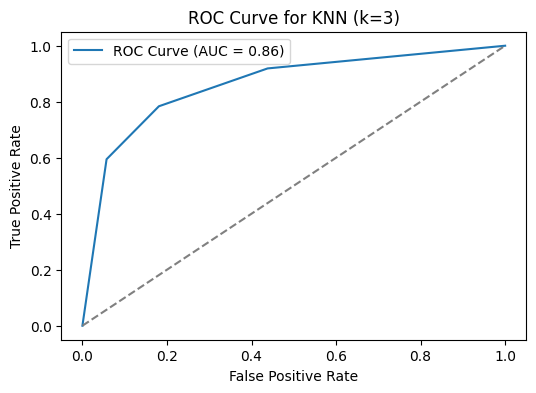


Results for 80-20 Train-Test Split with k=5:

Results for KNN (k=5):
Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall (Sensitivity): 0.7297297297297297
F1 Score: 0.7552447552447552
Specificity: 0.8571428571428571
Confusion Matrix:
 [[90 15]
 [20 54]]


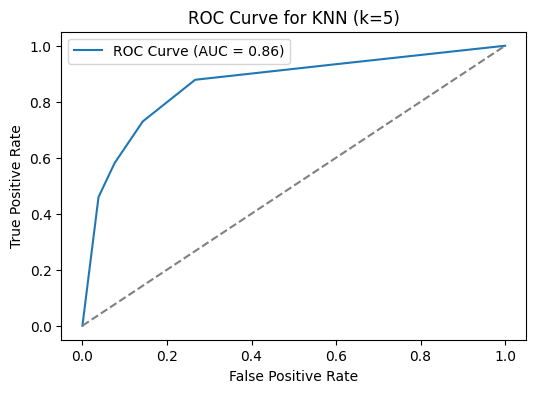

In [15]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score # Importing roc_curve and roc_auc_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill missing Age with median
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)  # Fill missing Embarked with mode
df["Fare"].fillna(df["Fare"].median(), inplace=True)  # Fill missing Fare with median

df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

X = df.drop(columns=["Survived"])
Y = df["Survived"]

def evaluate_knn(X_train, X_test, Y_train, Y_test, k):

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)


    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    sensitivity = rec

    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    print(f"\nResults for KNN (k={k}):")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall (Sensitivity):", sensitivity)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Confusion Matrix:\n", cm)

    Y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob) # roc_curve is now defined
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(Y_test, Y_pred_prob):.2f})") # roc_auc_score is now defined
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for KNN (k={k})")
    plt.legend()
    plt.show()

#Part 1
print("Results for 80-20 Train-Test Split with k=3:") # This print statement was inside the evaluate_knn function, moved outside
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
evaluate_knn(X_train, X_test, Y_train, Y_test, k=3)
#Part 2
print("\nResults for 80-20 Train-Test Split with k=5:") # This print statement was inside the evaluate_knn function, moved outside
evaluate_knn(X_train, X_test, Y_train, Y_test, k=5)

## Finally, Tree-Methods:

## 3. Decision Tree: Use this model to predict survival on the Titanic.

Part I:

Use a 80:20 train-test split.

Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. **Plot** the ROC curve.

Part II: Repeat the above with a 50:50 train test split.

Compare the results between Part 1 and Part 2. Which split gave you better results?

Try a Random Forest Classifier as well. Works very similarly to how a decision tree does.

Results for 80-20 Train-Test Split:

Results for Decision Tree (80:20):
Accuracy: 0.7206703910614525
Precision: 0.6578947368421053
Recall (Sensitivity): 0.6756756756756757
F1 Score: 0.6666666666666666
Specificity: 0.7523809523809524
Confusion Matrix:
 [[79 26]
 [24 50]]


<ipython-input-17-d749fec61bbc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-17-d749fec61bbc>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

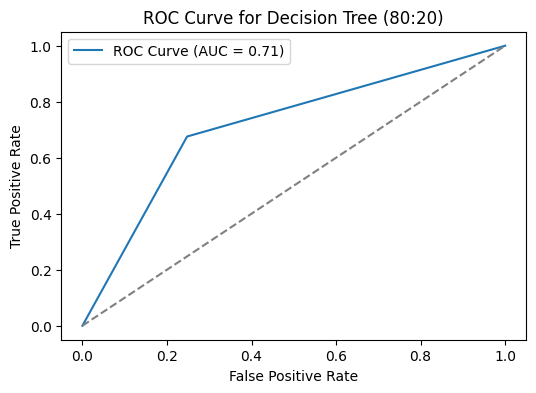


Results for Random Forest (80:20):
Accuracy: 0.8379888268156425
Precision: 0.8260869565217391
Recall (Sensitivity): 0.7702702702702703
F1 Score: 0.7972027972027972
Specificity: 0.8857142857142857
Confusion Matrix:
 [[93 12]
 [17 57]]


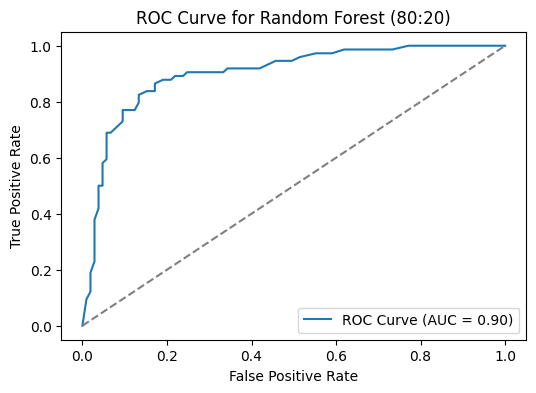


Results for 50-50 Train-Test Split:

Results for Decision Tree (50:50):
Accuracy: 0.7600896860986547
Precision: 0.7068965517241379
Recall (Sensitivity): 0.6871508379888268
F1 Score: 0.6968838526912181
Specificity: 0.8089887640449438
Confusion Matrix:
 [[216  51]
 [ 56 123]]


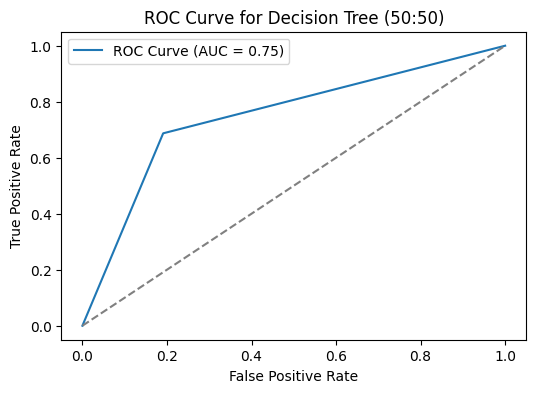


Results for Random Forest (50:50):
Accuracy: 0.8228699551569507
Precision: 0.8164556962025317
Recall (Sensitivity): 0.7206703910614525
F1 Score: 0.7655786350148368
Specificity: 0.8913857677902621
Confusion Matrix:
 [[238  29]
 [ 50 129]]


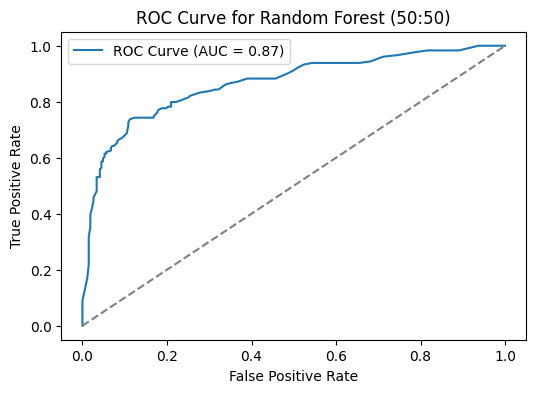

In [17]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)

df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

X = df.drop(columns=["Survived"])
Y = df["Survived"]

def evaluate_model(X_train, X_test, Y_train, Y_test, model, model_name):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    sensitivity = rec

    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    print(f"\nResults for {model_name}:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall (Sensitivity):", sensitivity)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Confusion Matrix:\n", cm)

    Y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(Y_test, Y_pred_prob):.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend()
    plt.show()

# Part I: 80-20 Split
print("Results for 80-20 Train-Test Split:")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Decision Tree
evaluate_model(X_train, X_test, Y_train, Y_test, DecisionTreeClassifier(random_state=42), "Decision Tree (80:20)")

# Random Forest
evaluate_model(X_train, X_test, Y_train, Y_test, RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest (80:20)")

# Part II: 50-50 Split
print("\nResults for 50-50 Train-Test Split:")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Decision Tree
evaluate_model(X_train, X_test, Y_train, Y_test, DecisionTreeClassifier(random_state=42), "Decision Tree (50:50)")

# Random Forest
evaluate_model(X_train, X_test, Y_train, Y_test, RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest (50:50)")